In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('phishing.csv')

In [3]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
df.shape

(11054, 32)

In [6]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split,cross_val_score

In [8]:
X= df.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [9]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [10]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [11]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

In [14]:
logreg_predict= model_1.predict(test_X)

In [15]:
accuracy_score(logreg_predict,test_Y)

0.9276454627675611

In [16]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



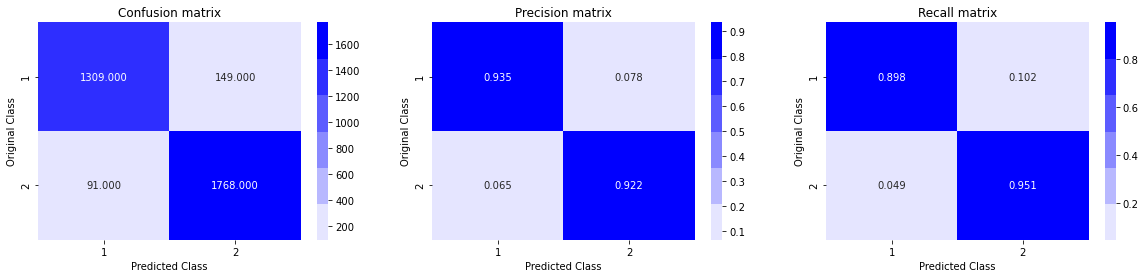

In [17]:
plot_confusion_matrix(test_Y, logreg_predict)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

In [20]:
knn_predict=model_2.predict(test_X)

In [21]:
accuracy_score(knn_predict,test_Y)

0.6343081097377148

In [22]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.63      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.63      0.63      0.63      3317



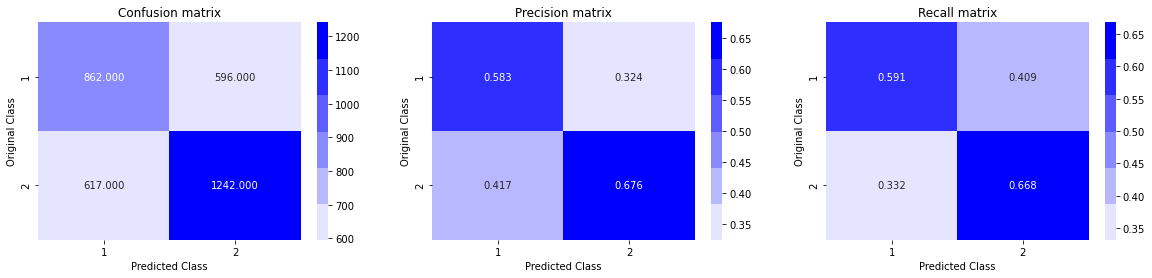

In [23]:
plot_confusion_matrix(test_Y, knn_predict)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [26]:
dtree_predict=model_3.predict(test_X)

In [27]:
accuracy_score(dtree_predict,test_Y)

0.9472414832680133

In [28]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1417
           1       0.96      0.94      0.95      1900

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



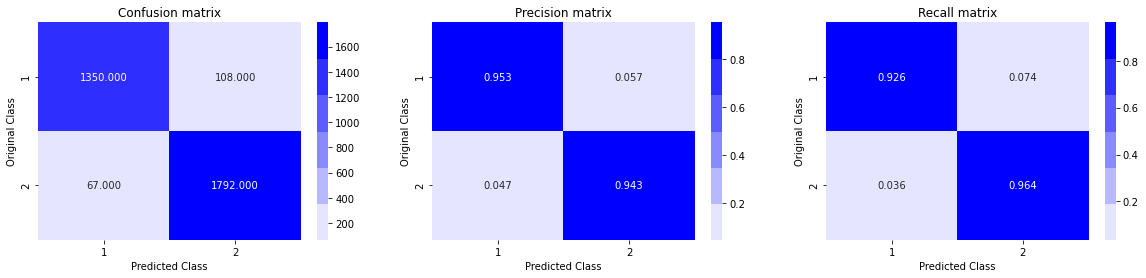

In [29]:
plot_confusion_matrix(test_Y, dtree_predict)

In [132]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=340, max_features='log2', min_samples_split=4,n_estimators=2000)
model_4=rfc.fit(train_X,train_Y)
rfc_predict=model_4.predict(test_X)
accuracy_score(rfc_predict,test_Y)

0.9710581851070245

In [133]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97      1420
           1       0.98      0.96      0.97      1897

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



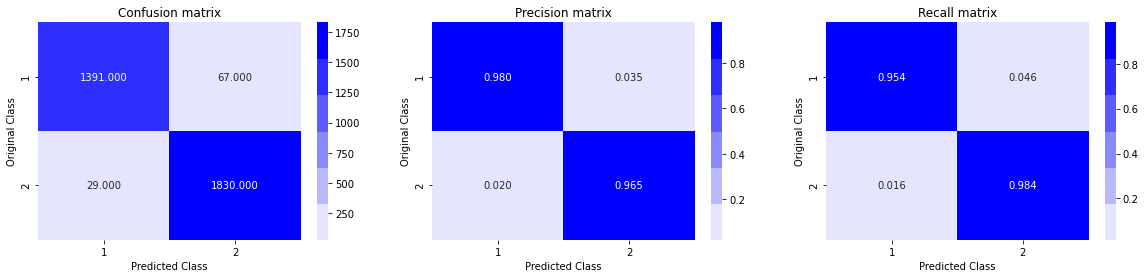

In [134]:
plot_confusion_matrix(test_Y, rfc_predict)

In [135]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor(iterations=20, depth=8, learning_rate=0.2, loss_function='RMSE')
model_5 = cat.fit(train_X,train_Y)
cat_predict=model_5.predict(test_X)
accuracy_score(cat_predict.round(),test_Y)

0:	learn: 0.8498741	total: 16.2ms	remaining: 308ms
1:	learn: 0.7375933	total: 29.4ms	remaining: 265ms
2:	learn: 0.6506131	total: 41ms	remaining: 232ms
3:	learn: 0.5835725	total: 52.8ms	remaining: 211ms
4:	learn: 0.5285290	total: 63.3ms	remaining: 190ms
5:	learn: 0.4929088	total: 74.9ms	remaining: 175ms
6:	learn: 0.4622568	total: 85.3ms	remaining: 158ms
7:	learn: 0.4423341	total: 96.6ms	remaining: 145ms
8:	learn: 0.4240445	total: 105ms	remaining: 129ms
9:	learn: 0.4091279	total: 114ms	remaining: 114ms
10:	learn: 0.4001848	total: 126ms	remaining: 103ms
11:	learn: 0.3938829	total: 136ms	remaining: 90.9ms
12:	learn: 0.3885148	total: 149ms	remaining: 80.2ms
13:	learn: 0.3834250	total: 160ms	remaining: 68.4ms
14:	learn: 0.3790917	total: 170ms	remaining: 56.7ms
15:	learn: 0.3753499	total: 179ms	remaining: 44.8ms
16:	learn: 0.3718093	total: 187ms	remaining: 33ms
17:	learn: 0.3692128	total: 195ms	remaining: 21.7ms
18:	learn: 0.3640574	total: 204ms	remaining: 10.8ms
19:	learn: 0.3614648	total: 2

0.8646367199276455

In [136]:
from xgboost import XGBClassifier

In [137]:
xgb=XGBClassifier()
model_7=xgb.fit(train_X,train_Y)

In [138]:
xgb_predict=model_7.predict(test_X)

In [139]:
accuracy_score(xgb_predict,test_Y)

0.962918299668375

In [38]:
print(classification_report(xgb_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96      1427
           1       0.98      0.96      0.97      1890

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



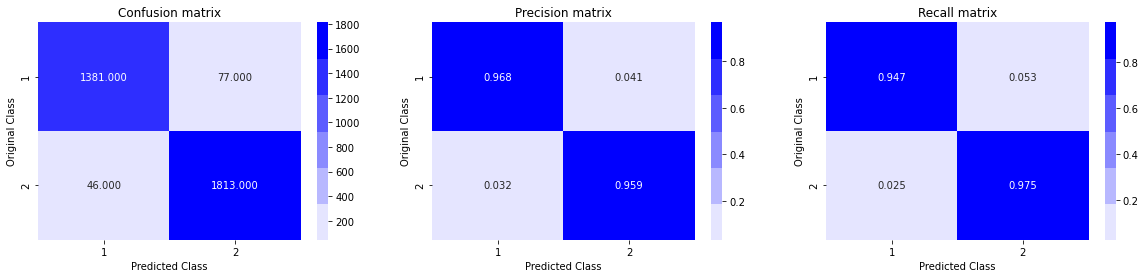

In [39]:
plot_confusion_matrix(test_Y, xgb_predict)

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

In [42]:
adc_predict=model_6.predict(test_X)
accuracy_score(adc_predict,test_Y)


0.9104612601748568

In [43]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



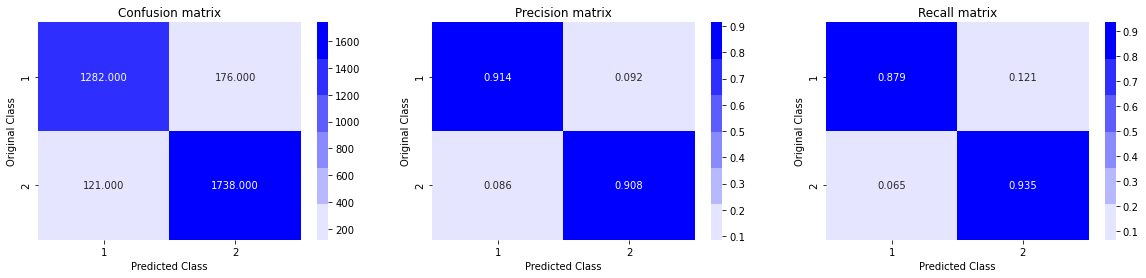

In [44]:
plot_confusion_matrix(test_Y, adc_predict)

In [45]:
import lightgbm as lgb 
from lightgbm import LGBMClassifier 

In [46]:
model = LGBMClassifier()
model_7 = model.fit(train_X, train_Y) 

In [47]:
LGM_predict=model_7.predict(test_X)
accuracy_score(LGM_predict,test_Y)

0.967741935483871

In [48]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



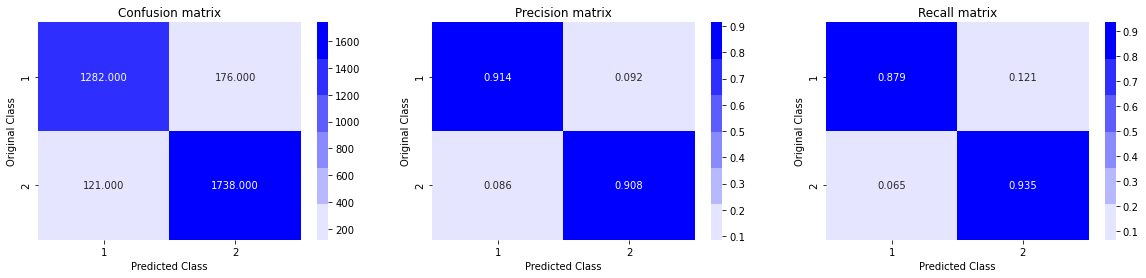

In [49]:
plot_confusion_matrix(test_Y, adc_predict)

In [50]:
from sklearn.ensemble import VotingClassifier

In [51]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
des_clf = DecisionTreeClassifier()
xgb_clf = XGBClassifier()
lgm_clf = LGBMClassifier()

In [53]:
vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('des', des_clf),('xgb',xgb_clf)], voting = 'hard')

In [54]:
vot_clf.fit(train_X, train_Y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rnd', RandomForestClassifier()),
                             ('des', DecisionTreeClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                    

In [55]:
vote_pred = vot_clf.predict(test_X)
accuracy_score(test_Y, vote_pred)

0.965330117576123

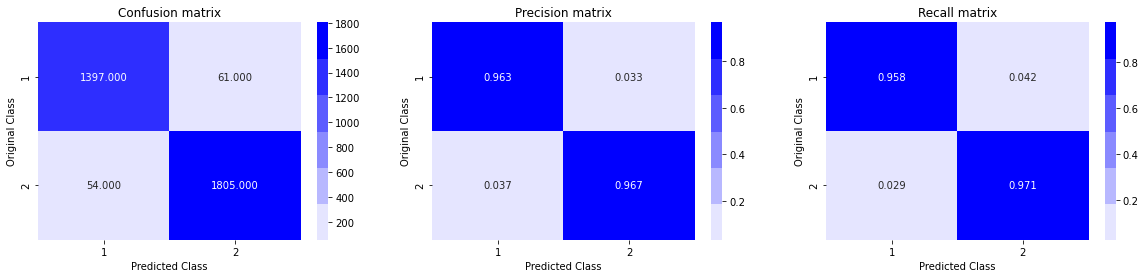

In [56]:
plot_confusion_matrix(test_Y, vote_pred)

In [140]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y),'\n')
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y),'\n')
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y),'\n')
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y),'\n')
print('XGBoost Accuracy:',accuracy_score(xgb_predict,test_Y),'\n')
print('LGMBoosting Accuracy:',accuracy_score(LGM_predict,test_Y),'\n')
print('Voting Accuracy:',accuracy_score(vote_pred,test_Y))

Logistic Regression Accuracy: 0.9276454627675611 

K-Nearest Neighbour Accuracy: 0.6343081097377148 

Decision Tree Classifier Accuracy: 0.9472414832680133 

Random Forest Classifier Accuracy: 0.9710581851070245 

XGBoost Accuracy: 0.962918299668375 

LGMBoosting Accuracy: 0.967741935483871 

Voting Accuracy: 0.965330117576123


## Cross Validation

### Voting Classifier

In [141]:
from sklearn.model_selection import cross_val_score,RepeatedKFold
score = cross_val_score(vot_clf,X,Y,cv=10)

In [142]:
score

array([0.97649186, 0.97377939, 0.96473779, 0.97287523, 0.97104072,
       0.9719457 , 0.96108597, 0.95113122, 0.96108597, 0.96561086])

In [143]:
score.mean()

0.966978472011979

In [144]:
score.max()

0.976491862567812

In [145]:
score.min()

0.951131221719457

### Logistic Regression

In [146]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_clf,X,Y,cv=10)

In [147]:
score

array([0.92224231, 0.92766727, 0.92405063, 0.93218807, 0.9239819 ,
       0.92850679, 0.91945701, 0.89683258, 0.91945701, 0.9158371 ])

In [90]:
score.mean()

0.9210220680287694

In [91]:
score.max()

0.9321880650994575

In [92]:
score.min()

0.8968325791855204

### K Nearest Neighbour

In [64]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_clf,X,Y,cv=10)

In [65]:
score

array([0.44303797, 0.48462929, 0.44394213, 0.48643761, 0.55656109,
       0.44615385, 0.50316742, 0.55837104, 0.44253394, 0.55746606])

In [66]:
score.mean()

0.49223004099400225

In [93]:
score.max()

0.9321880650994575

In [94]:
score.min()

0.8968325791855204

### Decision Tree

In [67]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree,X,Y,cv=10)

In [68]:
score

array([0.93128391, 0.97377939, 0.96654611, 0.96745027, 0.94932127,
       0.9321267 , 0.92579186, 0.92760181, 0.93936652, 0.92579186])

In [69]:
score.mean()

0.9439059674502713

In [95]:
score.max()

0.9321880650994575

In [96]:
score.min()

0.8968325791855204

### Random Forest

In [149]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc,X,Y,cv=10)

In [150]:
score

array([0.98191682, 0.97920434, 0.97016275, 0.97920434, 0.97737557,
       0.96561086, 0.9638009 , 0.9520362 , 0.9638009 , 0.96923077])

In [151]:
score.mean()

0.9702343449551194

In [152]:
score.max()

0.9819168173598554

In [153]:
score.min()

0.9520361990950226

### XGBoost 

In [103]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb,X,Y,cv=10)

In [104]:
score

array([0.96835443, 0.97377939, 0.96292948, 0.97016275, 0.96561086,
       0.97647059, 0.9638009 , 0.94660633, 0.96742081, 0.97013575])

In [105]:
score.mean()

0.966527128865178

In [106]:
score.max()

0.9764705882352941

In [107]:
score.min()

0.9466063348416289

### LGMBoost

In [108]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lgm_clf,X,Y,cv=10)

In [109]:
score

array([0.9755877 , 0.97830018, 0.96112116, 0.97830018, 0.96923077,
       0.97375566, 0.96923077, 0.9438914 , 0.96923077, 0.97013575])

In [110]:
score.mean()

0.9688784335545317

In [111]:
score.max()

0.9783001808318263

In [112]:
score.min()

0.9438914027149321

In [121]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [123]:


rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(train_X,train_Y)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [124]:
best_random_grid=rf_randomcv.best_estimator_

In [125]:
y_pred=best_random_grid.predict(test_X)
print(confusion_matrix(test_Y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_Y,y_pred)))
print("Classification report: {}".format(classification_report(test_Y,y_pred)))

[[1402   56]
 [  37 1822]]
Accuracy Score 0.9719626168224299
Classification report:               precision    recall  f1-score   support

          -1       0.97      0.96      0.97      1458
           1       0.97      0.98      0.98      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [340], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [127]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(train_X,train_Y)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 21.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [340],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1800, 1900, 2000, 2100, 2200]},
             verbose=2)

In [128]:
best_grid=grid_search.best_estimator_

In [131]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=340, max_features='log2', min_samples_split=4,
                       n_estimators=2000)

In [130]:
y_pred=best_grid.predict(test_X)
print(confusion_matrix(test_Y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_Y,y_pred)))
print("Classification report: {}".format(classification_report(test_Y,y_pred)))

[[1391   67]
 [  30 1829]]
Accuracy Score 0.970756707868556
Classification report:               precision    recall  f1-score   support

          -1       0.98      0.95      0.97      1458
           1       0.96      0.98      0.97      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317

